<a href="https://colab.research.google.com/github/Luigson/Minicurso-ciencia-de-dados/blob/main/Dia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
#importar dados
df1 = pd.read_csv('turmas-2023.1.csv', sep=';', index_col=None)
df2 = pd.read_csv('turmas-2023.2.csv', sep=';', index_col=None)
df3 = pd.read_csv('turmas-2024-1.csv', sep=';', index_col=None)
df4 = pd.read_csv('turmas-2024-2.csv', sep=';', index_col=None)

# Concatenar tudo em um único DataFrame
df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)
display(df_total)

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,NaN,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,NaN,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,3063244.0,NaN,NaN,80141,30,STRICTO SENSU,NaN,ICe Sala 0.16,2024,2,2024/10/07 00:00:00.000,2024/10/18 00:00:00.000,23456N123 (07/10/2024 - 18/10/2024),0.0,5.0,REGULAR,False,NaN,False,NaN,NaN,EXCLUÍDA,NaN,Presencial
60112,57760115,01,2370473.0,NaN,NaN,81488,30,TÉCNICO,NaN,Veterinária,2024,2,2024/09/16 00:00:00.000,2025/01/30 00:00:00.000,2M12 (16/09/2024 - 30/01/2025),NaN,30.0,REGULAR,False,2025/03/07 10:31:15.291000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
60113,57760258,01,NaN,83630.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,NaN,Presencial
60114,57760259,02,NaN,83631.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,NaN,Presencial


In [ ]:
# Visão geral
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_turma                   60116 non-null  int64  
 1   codigo_turma               60116 non-null  object 
 2   siape                      58785 non-null  float64
 3   matricula_docente_externo  1330 non-null   float64
 4   observacao                 1727 non-null   object 
 5   id_componente_curricular   60116 non-null  int64  
 6   ch_dedicada_periodo        60116 non-null  int64  
 7   nivel_ensino               60116 non-null  object 
 8   campus_turma               47449 non-null  object 
 9   local                      59773 non-null  object 
 10  ano                        60116 non-null  int64  
 11  periodo                    60116 non-null  int64  
 12  data_inicio                60116 non-null  object 
 13  data_fim                   60116 non-null  obj

In [ ]:
#5 primeiras linhas
df_total.head()

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,NaN,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,NaN,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial


In [ ]:
#Descrição
df_total.describe(include='all')

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
count,6.011600e+04,60116,5.878500e+04,1330.000000,1727,6.011600e+04,60116.000000,60116,47449,59773,60116.000000,60116.000000,60116,60116,58402,54283.000000,59890.000000,60116,60116,56838,60116,2.376000e+03,56680.000000,60116,0.0,60116
unique,NaN,213,NaN,NaN,945,NaN,NaN,5,5,4796,NaN,NaN,572,656,8583,NaN,NaN,3,2,32926,1,NaN,NaN,4,NaN,2
top,NaN,01,NaN,NaN,Esta turma é destinada aos alunos do curso de ...,NaN,NaN,GRADUAÇÃO,Campus Central,HUOL,NaN,NaN,2024/09/16 00:00:00.000,2024/07/06 00:00:00.000,3T1234,NaN,NaN,REGULAR,False,2025/01/29 11:34:26.866000000,False,NaN,NaN,CONSOLIDADA,NaN,Presencial
freq,NaN,27752,NaN,NaN,40,NaN,NaN,48122,38703,4093,NaN,NaN,9632,9091,629,NaN,NaN,59309,59081,33,60116,NaN,NaN,56954,NaN,59084
mean,5.773111e+07,NaN,2.221637e+06,50359.935338,NaN,1.705349e+05,29.507718,NaN,NaN,NaN,2023.497139,1.495226,NaN,NaN,NaN,17.822246,24.342712,NaN,NaN,NaN,NaN,5.772954e+07,91.466937,NaN,NaN,NaN
std,1.112257e+04,NaN,1.137572e+06,34927.064703,NaN,4.539591e+05,23.990604,NaN,NaN,NaN,0.499996,0.499981,NaN,NaN,NaN,22.652397,28.594672,NaN,NaN,NaN,NaN,1.149284e+04,94.803789,NaN,NaN,NaN
min,5.771186e+07,NaN,1.274600e+04,310.000000,NaN,1.865100e+04,0.000000,NaN,NaN,NaN,2023.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,5.771221e+07,0.000000,NaN,NaN,NaN
25%,5.772183e+07,NaN,1.326629e+06,7815.250000,NaN,5.685100e+04,10.000000,NaN,NaN,NaN,2023.000000,1.000000,NaN,NaN,NaN,4.000000,6.000000,NaN,NaN,NaN,NaN,5.771781e+07,36.000000,NaN,NaN,NaN
50%,5.773117e+07,NaN,2.075402e+06,72071.000000,NaN,6.334000e+04,24.000000,NaN,NaN,NaN,2023.000000,1.000000,NaN,NaN,NaN,9.000000,17.000000,NaN,NaN,NaN,NaN,5.772861e+07,68.000000,NaN,NaN,NaN
75%,5.774106e+07,NaN,3.050287e+06,81986.000000,NaN,7.159300e+04,60.000000,NaN,NaN,NaN,2024.000000,2.000000,NaN,NaN,NaN,26.000000,40.000000,NaN,NaN,NaN,NaN,5.773832e+07,80.000000,NaN,NaN,NaN


In [ ]:
df_total.isnull().sum()

,0
id_turma,0
codigo_turma,0
siape,1331
matricula_docente_externo,58786
observacao,58389
id_componente_curricular,0
ch_dedicada_periodo,0
nivel_ensino,0
campus_turma,12667
local,343


In [ ]:
#Quais são colunas
df_total.columns

Index(['id_turma', 'codigo_turma', 'siape', 'matricula_docente_externo',
       'observacao', 'id_componente_curricular', 'ch_dedicada_periodo',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes'],
      dtype='object')

In [ ]:
#Apagar colunas não aproveitáveis

#Apagar coluna convênio (totalmente vazia)
df_total = df_total.drop('convenio', axis=1)

display(df_total)

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,3063244.0,NaN,NaN,80141,30,STRICTO SENSU,NaN,ICe Sala 0.16,2024,2,2024/10/07 00:00:00.000,2024/10/18 00:00:00.000,23456N123 (07/10/2024 - 18/10/2024),0.0,5.0,REGULAR,False,NaN,False,NaN,NaN,EXCLUÍDA,Presencial
60112,57760115,01,2370473.0,NaN,NaN,81488,30,TÉCNICO,NaN,Veterinária,2024,2,2024/09/16 00:00:00.000,2025/01/30 00:00:00.000,2M12 (16/09/2024 - 30/01/2025),NaN,30.0,REGULAR,False,2025/03/07 10:31:15.291000000,False,NaN,0.0,CONSOLIDADA,Presencial
60113,57760258,01,NaN,83630.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,Presencial
60114,57760259,02,NaN,83631.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,Presencial


In [ ]:
#Apagar coluna id_turma_agrupadora (majoritariamente vazia)
df_total = df_total.drop('id_turma_agrupadora', axis=1)
display(df_total)

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,0.0,CONSOLIDADA,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,13.0,CONSOLIDADA,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,11.0,CONSOLIDADA,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,18.0,CONSOLIDADA,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,18.0,CONSOLIDADA,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,3063244.0,NaN,NaN,80141,30,STRICTO SENSU,NaN,ICe Sala 0.16,2024,2,2024/10/07 00:00:00.000,2024/10/18 00:00:00.000,23456N123 (07/10/2024 - 18/10/2024),0.0,5.0,REGULAR,False,NaN,False,NaN,EXCLUÍDA,Presencial
60112,57760115,01,2370473.0,NaN,NaN,81488,30,TÉCNICO,NaN,Veterinária,2024,2,2024/09/16 00:00:00.000,2025/01/30 00:00:00.000,2M12 (16/09/2024 - 30/01/2025),NaN,30.0,REGULAR,False,2025/03/07 10:31:15.291000000,False,0.0,CONSOLIDADA,Presencial
60113,57760258,01,NaN,83630.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,ABERTA,Presencial
60114,57760259,02,NaN,83631.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,ABERTA,Presencial


In [ ]:
# Create 'id_docente' column: use 'siape' if not null, otherwise use 'matricula_docente_externo'
df_total['id_docente'] = np.where(df_total['siape'].notnull(), df_total['siape'], df_total['matricula_docente_externo'])

# Create 'docente_interno' column: True if 'siape' was used for 'id_docente', False otherwise
df_total['docente_interno'] = df_total['siape'].notnull()
df_total = df_total.drop(columns=['siape', 'matricula_docente_externo'])

In [ ]:
# Dado que as observações ocorrem em poucas turmas, a melhor prática é separar uma tabela para obersavções e remover a coluna observação do nosso dataset principal
obs_df = df_total[df_total["observacao"].notnull()][["id_turma","codigo_turma","id_docente","docente_interno", "observacao"]]
df_total = df_total.drop(columns=["observacao"])
print(obs_df.shape)
obs_df.to_csv("observacoes_turmas.csv", index=False)
display(obs_df.head())

(1727, 5)


,id_turma,codigo_turma,id_docente,docente_interno,observacao
262,57712152,01,1812476.0,True,"6 Canto Pop, 1 bater, 1baixo elét., 1 guitar, ..."
269,57712159,02,1812476.0,True,"7 Canto Pop, 1 bater, 1baixo elét., 1 guitar, ..."
312,57712201,04,2265109.0,True,Dedicada ao estudo do Choro;
379,57712252,14,2275876.0,True,*Destinada a Ana Raquel A. P. S. Rosa - Matríc...
380,57712253,15,4614196.0,True,*Destinada a vínculo trancado: Bruna dos Santo...


In [ ]:
display(df_total[df_total["id_docente"].isnull()])
print(df_total["id_docente"].max())

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
59813,57750420,01,59275,20,STRICTO SENSU,NaN,SALA 71,2024,2,2024/10/01 00:00:00.000,2024/10/31 00:00:00.000,4N234 5N1234,10.0,25.0,REGULAR,False,2025/01/09 15:39:18.989000000,False,0.0,CONSOLIDADA,Presencial,NaN,False


9350807.0


In [ ]:
# Aqui preenchemos o valor faltante
df_total["id_docente"] = df_total["id_docente"].fillna(9350808)

In [ ]:
#Verificando dados que faltam
df_total.isna().sum()

,0
id_turma,0
codigo_turma,0
id_componente_curricular,0
ch_dedicada_periodo,0
nivel_ensino,0
campus_turma,12667
local,343
ano,0
periodo,0
data_inicio,0


In [ ]:
#Preenchendo os que faltam
#Campus_turma
df_total['campus_turma'] = df_total['campus_turma'].fillna('Não informado')
#Local
df_total['local'] = df_total['local'].fillna('Não definido')
#descricao_horario
df_total['descricao_horario'] = df_total['descricao_horario'].fillna('Não informado')
#total_solicitacoes
df_total['total_solicitacoes'] = df_total['total_solicitacoes'].fillna(0)
df_total["total_solicitacoes"] = df_total["total_solicitacoes"].astype(int)
#capacidade_aluno
df_total['capacidade_aluno'] = df_total['capacidade_aluno'].fillna(0)
df_total["capacidade_aluno"] = df_total["capacidade_aluno"].astype(int)
#data_consolidacao
df_total['data_consolidacao'] = df_total['data_consolidacao'].fillna('Não Consolidada')
#qtd_aulas_lancadas
df_total["qtd_aulas_lancadas"] = df_total["qtd_aulas_lancadas"].fillna(0).astype(int)
#id_docente
df_total["id_docente"] = df_total["id_docente"].astype(int).astype(str)
df_total["id_turma"] = df_total["id_turma"].astype(int).astype(str)

In [ ]:
#Verificando se ainda há dados faltantes
df_total.isna().sum()

,0
id_turma,0
codigo_turma,0
id_componente_curricular,0
ch_dedicada_periodo,0
nivel_ensino,0
campus_turma,0
local,0
ano,0
periodo,0
data_inicio,0


In [ ]:
#Remover duplicatas
df_total.drop_duplicates(inplace=True)

In [ ]:
#Convertendo tipo de dado com pd.to_numeric() ou pd.to_datetime() ou astype()
df_total['id_componente_curricular'] = df_total['id_componente_curricular'].astype(str)
df_total['data_inicio'] = pd.to_datetime(df_total['data_inicio'], errors='coerce')
df_total['data_fim'] = pd.to_datetime(df_total['data_fim'], errors='coerce')
df_total['data_consolidacao'] = pd.to_datetime(df_total['data_consolidacao'], errors='coerce')
df_total['qtd_aulas_lancadas'] = pd.to_numeric(df_total['qtd_aulas_lancadas'], errors='coerce').astype(int)
df_total['capacidade_aluno'] = pd.to_numeric(df_total['capacidade_aluno'], errors='coerce').astype(int)
df_total['total_solicitacoes'] = pd.to_numeric(df_total['total_solicitacoes'], errors='coerce').astype(int)

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59148 entries, 0 to 60115
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_turma                  59148 non-null  object        
 1   codigo_turma              59148 non-null  object        
 2   id_componente_curricular  59148 non-null  object        
 3   ch_dedicada_periodo       59148 non-null  int64         
 4   nivel_ensino              59148 non-null  object        
 5   campus_turma              59148 non-null  object        
 6   local                     59148 non-null  object        
 7   ano                       59148 non-null  int64         
 8   periodo                   59148 non-null  int64         
 9   data_inicio               59148 non-null  datetime64[ns]
 10  data_fim                  59148 non-null  datetime64[ns]
 11  descricao_horario         59148 non-null  object        
 12  total_solicitacoes     

In [ ]:
display(df_total)

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:59:04.285,False,0,CONSOLIDADA,Presencial,1174208,True
1,57711865,02,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:53:20.671,False,13,CONSOLIDADA,Presencial,1174208,True
2,57711866,03,69258,15,TÉCNICO,Não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:57:36.425,False,11,CONSOLIDADA,Presencial,1174208,True
3,57711867,01,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:14:34.285,False,18,CONSOLIDADA,Presencial,1812476,True
4,57711868,02,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:13:43.535,False,18,CONSOLIDADA,Presencial,1812476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,80141,30,STRICTO SENSU,Não informado,ICe Sala 0.16,2024,2,2024-10-07,2024-10-18,23456N123 (07/10/2024 - 18/10/2024),0,5,REGULAR,False,NaT,False,0,EXCLUÍDA,Presencial,3063244,True
60112,57760115,01,81488,30,TÉCNICO,Não informado,Veterinária,2024,2,2024-09-16,2025-01-30,2M12 (16/09/2024 - 30/01/2025),0,30,REGULAR,False,2025-03-07 10:31:15.291,False,0,CONSOLIDADA,Presencial,2370473,True
60113,57760258,01,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,False,0,ABERTA,Presencial,83630,False
60114,57760259,02,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,False,0,ABERTA,Presencial,83631,False


In [ ]:
#Notei que a coluna agrupadora só estão completas com false, então resolvi removê-las
df_total = df_total.drop('agrupadora', axis=1)
display(df_total)

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:59:04.285,0,CONSOLIDADA,Presencial,1174208,True
1,57711865,02,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:53:20.671,13,CONSOLIDADA,Presencial,1174208,True
2,57711866,03,69258,15,TÉCNICO,Não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:57:36.425,11,CONSOLIDADA,Presencial,1174208,True
3,57711867,01,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:14:34.285,18,CONSOLIDADA,Presencial,1812476,True
4,57711868,02,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:13:43.535,18,CONSOLIDADA,Presencial,1812476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,80141,30,STRICTO SENSU,Não informado,ICe Sala 0.16,2024,2,2024-10-07,2024-10-18,23456N123 (07/10/2024 - 18/10/2024),0,5,REGULAR,False,NaT,0,EXCLUÍDA,Presencial,3063244,True
60112,57760115,01,81488,30,TÉCNICO,Não informado,Veterinária,2024,2,2024-09-16,2025-01-30,2M12 (16/09/2024 - 30/01/2025),0,30,REGULAR,False,2025-03-07 10:31:15.291,0,CONSOLIDADA,Presencial,2370473,True
60113,57760258,01,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,0,ABERTA,Presencial,83630,False
60114,57760259,02,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,0,ABERTA,Presencial,83631,False


In [ ]:
# Padronização de Texto
df_total['nivel_ensino'] = df_total['nivel_ensino'].str.lower().str.strip()
df_total['campus_turma'] = df_total['campus_turma'].str.lower().str.strip()
df_total['tipo'] = df_total['tipo'].str.lower().str.strip()
df_total['situacao_turma'] = df_total['situacao_turma'].str.lower().str.strip()


display(df_total)

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,técnico,não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:59:04.285,0,consolidada,Presencial,1174208,True
1,57711865,02,69258,15,técnico,não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:53:20.671,13,consolidada,Presencial,1174208,True
2,57711866,03,69258,15,técnico,não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:57:36.425,11,consolidada,Presencial,1174208,True
3,57711867,01,69289,15,técnico,não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-10 09:14:34.285,18,consolidada,Presencial,1812476,True
4,57711868,02,69289,15,técnico,não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-10 09:13:43.535,18,consolidada,Presencial,1812476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,80141,30,stricto sensu,não informado,ICe Sala 0.16,2024,2,2024-10-07,2024-10-18,23456N123 (07/10/2024 - 18/10/2024),0,5,regular,False,NaT,0,excluída,Presencial,3063244,True
60112,57760115,01,81488,30,técnico,não informado,Veterinária,2024,2,2024-09-16,2025-01-30,2M12 (16/09/2024 - 30/01/2025),0,30,regular,False,2025-03-07 10:31:15.291,0,consolidada,Presencial,2370473,True
60113,57760258,01,78793,12,lato sensu,não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,regular,False,NaT,0,aberta,Presencial,83630,False
60114,57760259,02,78793,12,lato sensu,não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,regular,False,NaT,0,aberta,Presencial,83631,False


In [ ]:
# Salvo como CSV (cria o arquivo)
df_total.to_csv('turmas_tratadas.csv', index=False, sep=';')

# Baixo o arquivo
from google.colab import files
files.download('turmas_tratadas.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Dia 2

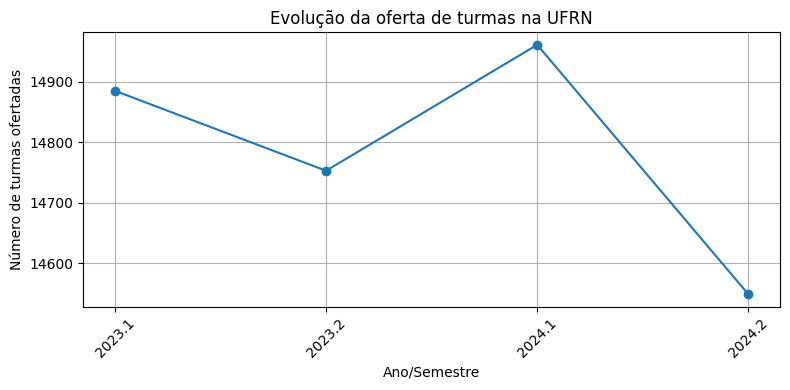

In [ ]:
#Como a oferta de turmas da UFRN evoluiu ao longo dos anos?
oferta_por_semestre = df_total.groupby(['ano', 'periodo']).size().reset_index(name='qtd_turmas')

oferta_por_semestre['ano_periodo'] = oferta_por_semestre['ano'].astype(str) + '.' + oferta_por_semestre['periodo'].astype(str)

plt.figure(figsize=(8, 4))
plt.plot(oferta_por_semestre['ano_periodo'], oferta_por_semestre['qtd_turmas'], marker='o')
plt.xlabel('Ano/Semestre')
plt.ylabel('Número de turmas ofertadas')
plt.title('Evolução da oferta de turmas na UFRN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

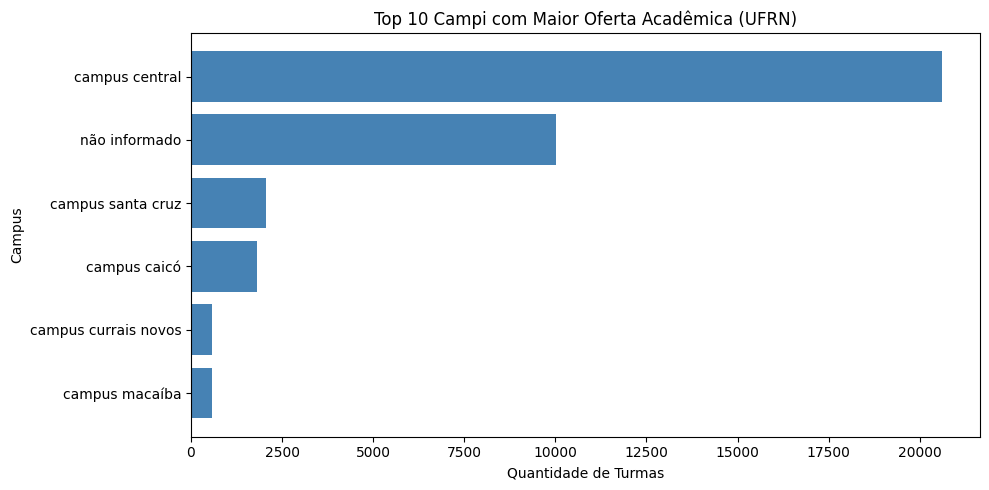

In [ ]:
#Quais campi concentram a maior parte da oferta acadêmica?
oferta_por_campus = (df_total.groupby('campus_turma')['id_turma'].nunique().reset_index(name='qtd_turmas').sort_values(by='qtd_turmas', ascending=False))
top10 = oferta_por_campus.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10['campus_turma'], top10['qtd_turmas'], color='steelblue')
plt.xlabel('Quantidade de Turmas')
plt.ylabel('Campus')
plt.title('Top 10 Campi com Maior Oferta Acadêmica (UFRN)')
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()

In [ ]:
#Existe diferença na capacidade média das turmas entre diferentes níveis de ensino?
media_por_nivel = (df_total.groupby('nivel_ensino')['capacidade_aluno'].mean().reset_index(name='capacidade_media').sort_values(by='capacidade_media', ascending=False))
display(media_por_nivel)

,nivel_ensino,capacidade_media
2,lato sensu,59.325450
1,graduação,25.439258
4,técnico,24.344733
0,formação complementar,20.204969
3,stricto sensu,13.611355


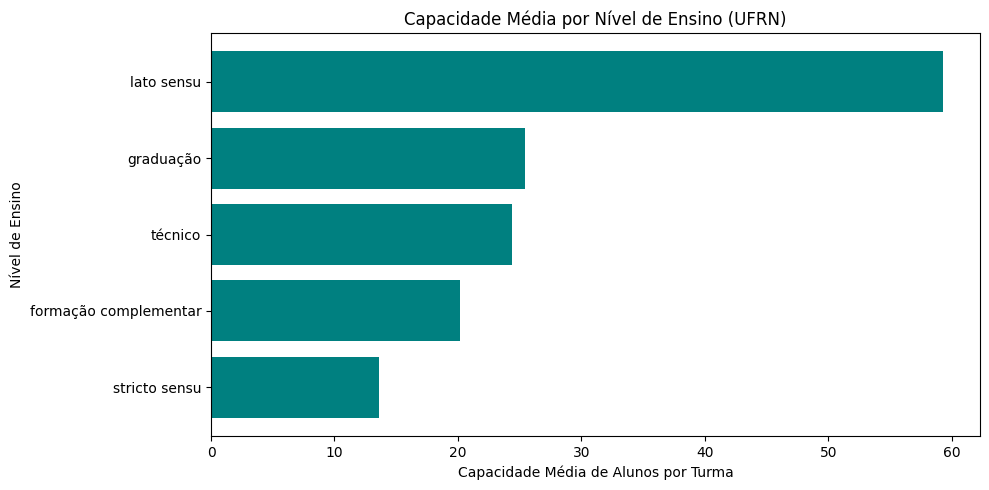

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(media_por_nivel['nivel_ensino'], media_por_nivel['capacidade_media'], color='teal')
plt.xlabel('Capacidade Média de Alunos por Turma')
plt.ylabel('Nível de Ensino')
plt.title('Capacidade Média por Nível de Ensino (UFRN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
#Como a modalidade à distância se distribui entre os diferentes campi e níveis?
df_ead = df_total[df_total['distancia'] == True]

In [ ]:
ead_por_campus = (df_ead.groupby('campus_turma')['id_turma'].nunique().reset_index(name='turmas_ead').sort_values(by='turmas_ead', ascending=False))
display(ead_por_campus)

,campus_turma,turmas_ead
0,não informado,925


In [ ]:
ead_por_nivel = (df_ead.groupby('nivel_ensino')['id_turma'].nunique().reset_index(name='turmas_ead').sort_values(by='turmas_ead', ascending=False))
display(ead_por_nivel)

,nivel_ensino,turmas_ead
0,graduação,646
1,lato sensu,135
3,técnico,117
2,stricto sensu,27


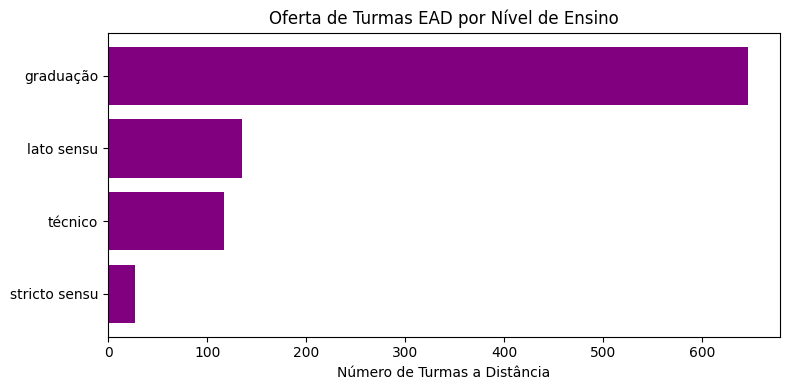

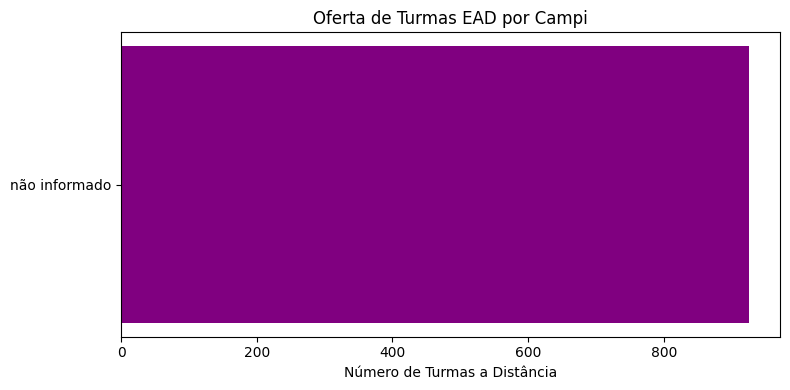

In [ ]:
plt.figure(figsize=(8, 4))
plt.barh(ead_por_nivel['nivel_ensino'], ead_por_nivel['turmas_ead'], color='purple')
plt.xlabel('Número de Turmas a Distância')
plt.title('Oferta de Turmas EAD por Nível de Ensino')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.barh(ead_por_campus['campus_turma'], ead_por_campus['turmas_ead'], color='purple')
plt.xlabel('Número de Turmas a Distância')
plt.title('Oferta de Turmas EAD por Campi')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

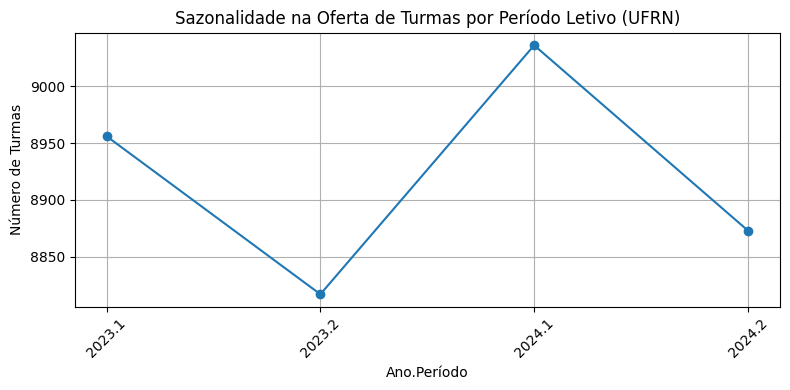

In [ ]:
#Há sazonalidade na oferta de turmas entre os períodos letivos?
oferta_por_periodo = (df_total.groupby(['ano', 'periodo'])['id_turma'].nunique().reset_index(name='qtd_turmas').sort_values(['ano', 'periodo']))
oferta_por_periodo['ano_periodo'] = (oferta_por_periodo['ano'].astype(str) + '.' + oferta_por_periodo['periodo'].astype(str))
plt.figure(figsize=(8, 4))
plt.plot(oferta_por_periodo['ano_periodo'], oferta_por_periodo['qtd_turmas'], marker='o')
plt.title('Sazonalidade na Oferta de Turmas por Período Letivo (UFRN)')
plt.xlabel('Ano.Período')
plt.ylabel('Número de Turmas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

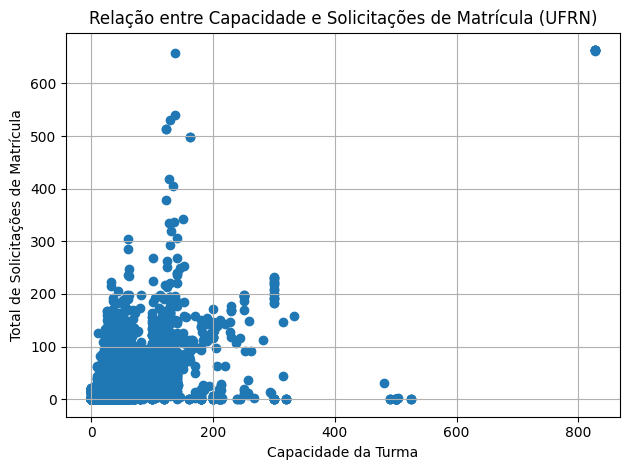

In [ ]:
#Qual a relação entre a capacidade das turmas e o número de solicitações de matrícula?
plt.scatter(df_total['capacidade_aluno'], df_total['total_solicitacoes'], marker='o')
plt.xlabel('Capacidade da Turma')
plt.ylabel('Total de Solicitações de Matrícula')
plt.title('Relação entre Capacidade e Solicitações de Matrícula (UFRN)')
plt.grid(True)
plt.tight_layout()
plt.show()

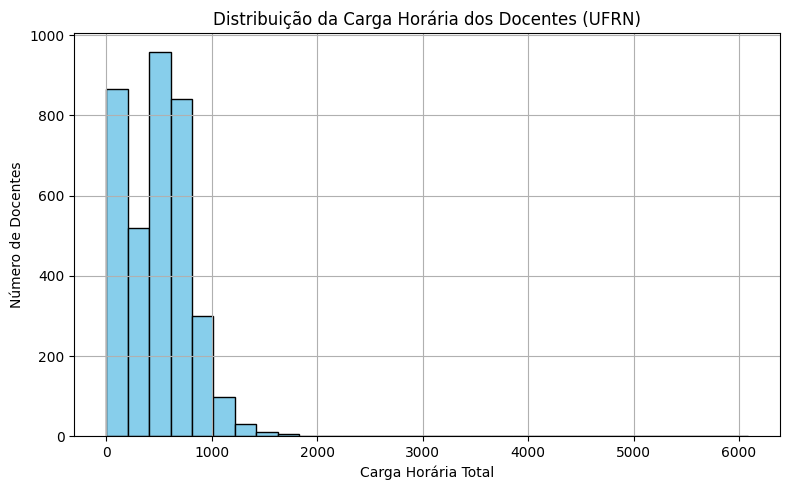

In [ ]:
#Existem padrões na carga horária dedicada pelos docentes?
df_docentes = df_total.dropna(subset=['id_docente'])
carga_horaria_por_docente = (df_docentes.groupby('id_docente')['ch_dedicada_periodo'].sum().reset_index(name='carga_horaria_total').sort_values(by='carga_horaria_total', ascending=False))
plt.figure(figsize=(8, 5))
plt.hist(carga_horaria_por_docente['carga_horaria_total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Carga Horária Total')
plt.ylabel('Número de Docentes')
plt.title('Distribuição da Carga Horária dos Docentes (UFRN)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Há diferenças significativas entre turmas presenciais e à distância em termos de capacidade e demanda?
turmas_presenciais = (df_total.groupby([df_total['distancia'] == 'false'])['capacidade_aluno'])

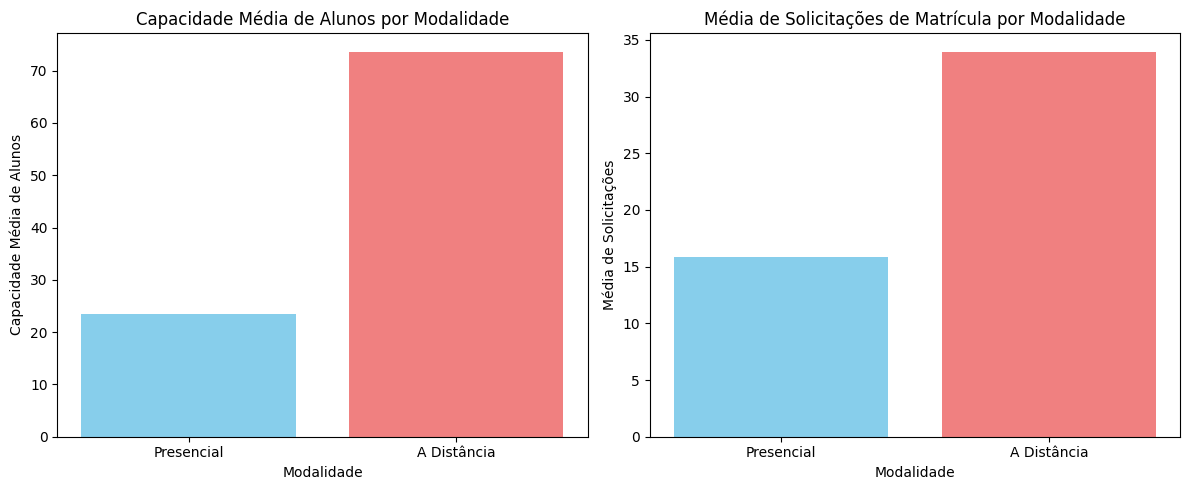

In [ ]:
# Comparar capacidade e demanda entre turmas presenciais e a distância
comparacao_modalidades = df_total.groupby('distancia')[['capacidade_aluno', 'total_solicitacoes']].mean().reset_index()

# Renomear a coluna 'distancia' para melhor legibilidade
comparacao_modalidades['distancia'] = comparacao_modalidades['distancia'].map({True: 'A Distância', False: 'Presencial'})

# Criar gráficos para visualização usando plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para Capacidade Média
axes[0].bar(comparacao_modalidades['distancia'], comparacao_modalidades['capacidade_aluno'], color=['skyblue', 'lightcoral'])
axes[0].set_title('Capacidade Média de Alunos por Modalidade')
axes[0].set_xlabel('Modalidade')
axes[0].set_ylabel('Capacidade Média de Alunos')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico para Total de Solicitações Médio
axes[1].bar(comparacao_modalidades['distancia'], comparacao_modalidades['total_solicitacoes'], color=['skyblue', 'lightcoral'])
axes[1].set_title('Média de Solicitações de Matrícula por Modalidade')
axes[1].set_xlabel('Modalidade')
axes[1].set_ylabel('Média de Solicitações')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
#Dia 3

#Escolha de Variáveis
| Variável              | Tipo       | Justificativa                                                                |
| --------------------- | ---------- | ---------------------------------------------------------------------------- |
| `capacidade_aluno`    | Numérica   | Representa o tamanho máximo da turma                                         |
| `ch_dedicada_periodo` | Numérica   | Mede a carga horária total da turma no período                               |
| `total_solicitacoes`  | Numérica   | Indica a demanda — fundamental para ver desequilíbrios entre oferta/demanda. |
| `distancia`           | Booleana   | Permite distinguir turmas EAD e presenciais — pode criar agrupamentos.       |
| `nivel_ensino`        | Categórica | Permite identificar diferenças entre técnico, graduação, pós etc.            |

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. One-Hot Encoding para a variável 'nivel_ensino'
df_total = pd.get_dummies(df_total, columns=['nivel_ensino'], prefix='nivel_ensino')

# 2. Conversão da variável booleana 'distancia' para 0 e 1
df_total['distancia'] = df_total['distancia'].astype(int)

# 3. Padronização das variáveis numéricas
from sklearn.preprocessing import StandardScaler

numeric_cols = ['capacidade_aluno', 'ch_dedicada_periodo', 'total_solicitacoes']
scaler = StandardScaler()
df_total[numeric_cols] = scaler.fit_transform(df_total[numeric_cols])

